### read data from JSON files using pandas. then, start to do data manipulation, Cleaning & visualization


### read data from JSON files using pandas. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
df = pd.read_json('data.json')

In [3]:
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [4]:
df.columns

Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.6 KB


In [6]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.800000
std,42.299949,14.510259,16.450434,266.377134
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


### cleaning the data

In [7]:
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [8]:
df[df['Calories'].isna()]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
91,45,107,137,NaN
118,60,105,125,NaN
141,60,97,127,NaN


In [9]:
df.groupby(['Duration','Pulse']).mean()

Maxpulse  Calories
Duration Pulse                    
15       80        100.0      50.5
         124       139.0     124.2
20       83        107.0      50.3
         95        112.0      77.7
         106       136.0     110.4
...                  ...       ...
180      101       127.0     600.1
210      108       160.0    1376.0
         137       184.0    1860.4
270      100       131.0    1729.0
300      108       143.0    1500.2

[94 rows x 2 columns]

In [10]:
df.groupby(['Duration','Pulse']).mean().loc[(60,92)]['Calories']

242.0

In [11]:
for Dur in df.Duration.unique():
    for Pulse in df.Pulse.unique():
        df.loc[(df['Duration'] == Dur  )& (df['Calories'].isna()) & (df['Pulse'] == Pulse ),'Calories'] \
        = df.groupby('Duration').mean().loc[Dur]['Calories']

In [12]:
df[df['Calories'].isna()]

,Duration,Pulse,Maxpulse,Calories


In [13]:
df[df.duplicated()].sort_values('Duration')

,Duration,Pulse,Maxpulse,Calories
40,45,90,112,180.1
113,45,100,120,225.3
36,60,102,127,300.5
38,60,100,120,300.0
71,60,109,153,387.6
155,60,111,151,368.5


there is no real duplicates here 

In [14]:
col_list  = df.columns[1:]
col_list

Index(['Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [15]:
df.Duration.unique()

array([ 60,  45,  30,  80,  20, 210, 160, 180, 150, 300,  90, 120, 270,
        15,  25,  75], dtype=int64)

This is the Box plot for Pulse


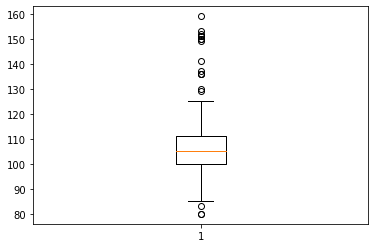

This is the Box plot for Maxpulse


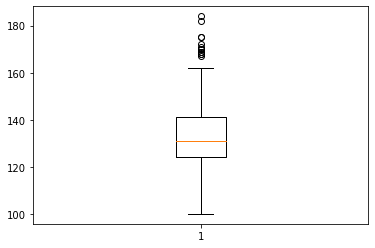

This is the Box plot for Calories


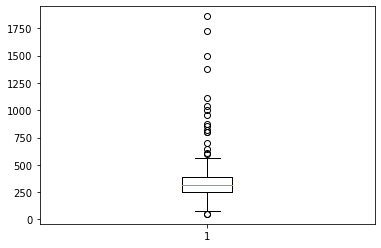

In [16]:
for col in col_list:
    print(f"This is the Box plot for {col}")
    plt.boxplot(df[col]);
    plt.show()

For 60
This is the Box plot for Pulse


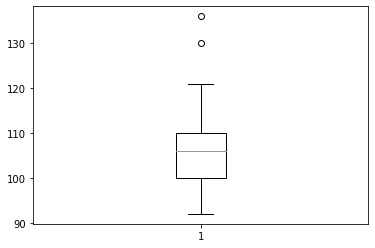

This is the Box plot for Maxpulse


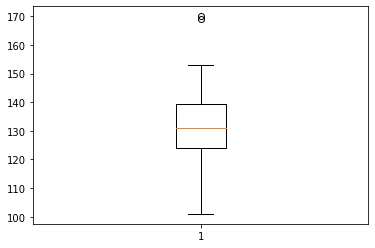

This is the Box plot for Calories


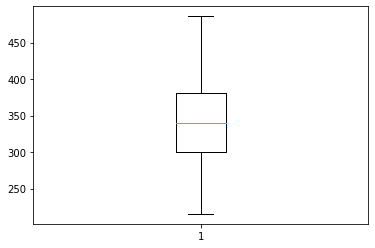

For 45
This is the Box plot for Pulse


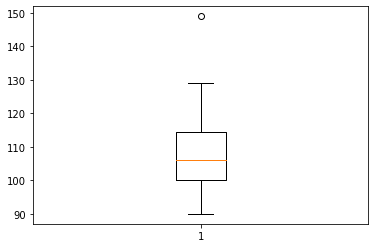

This is the Box plot for Maxpulse


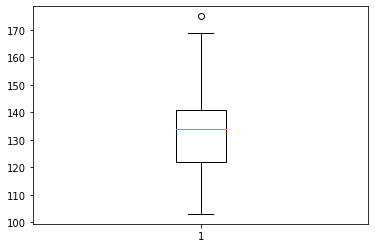

This is the Box plot for Calories


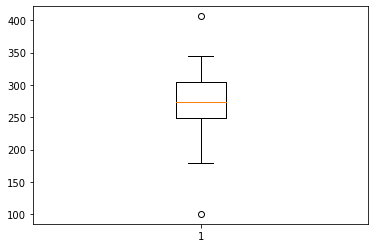

For 30
This is the Box plot for Pulse


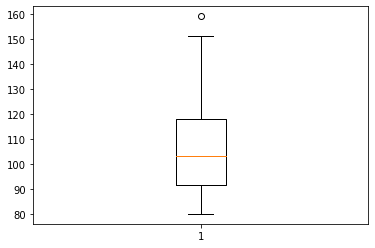

This is the Box plot for Maxpulse


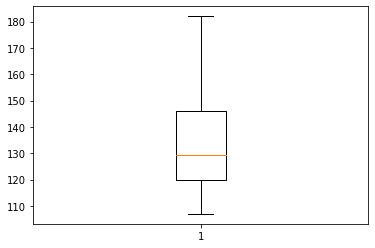

This is the Box plot for Calories


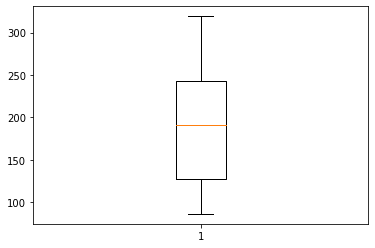

For 80
This is the Box plot for Pulse


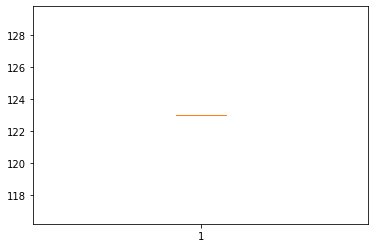

This is the Box plot for Maxpulse


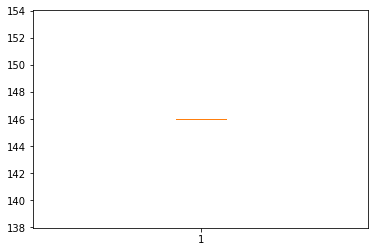

This is the Box plot for Calories


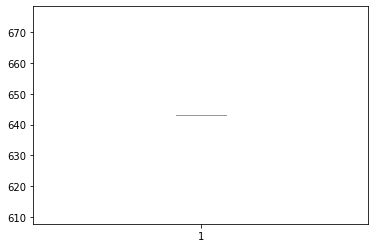

For 20
This is the Box plot for Pulse


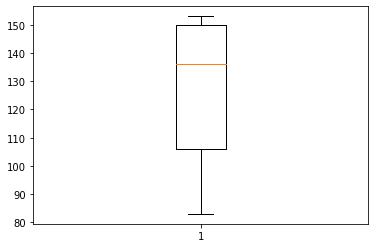

This is the Box plot for Maxpulse


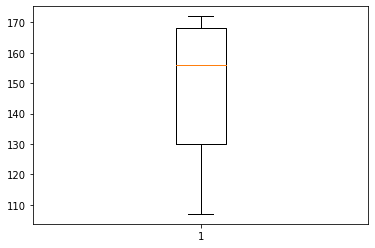

This is the Box plot for Calories


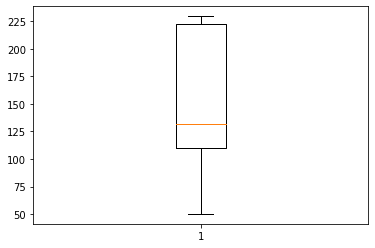

For 210
This is the Box plot for Pulse


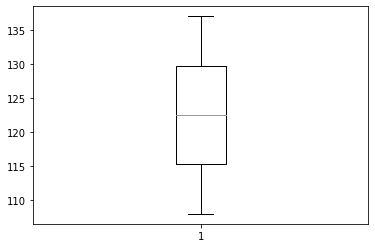

This is the Box plot for Maxpulse


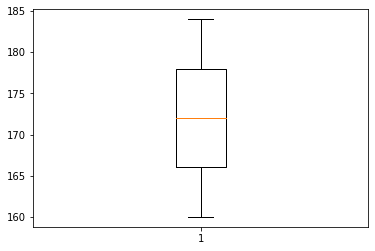

This is the Box plot for Calories


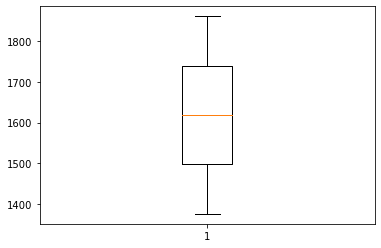

For 160
This is the Box plot for Pulse


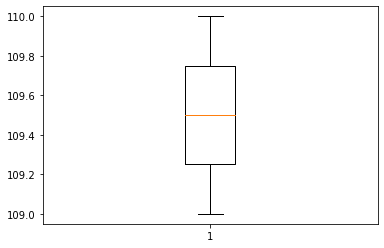

This is the Box plot for Maxpulse


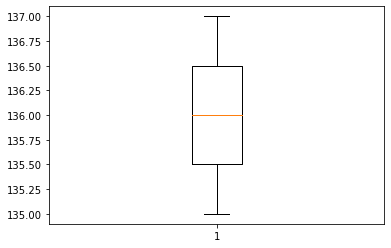

This is the Box plot for Calories


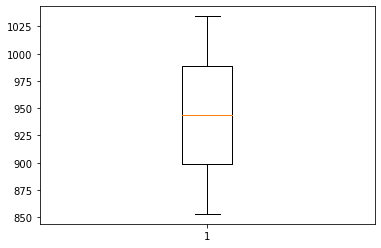

For 180
This is the Box plot for Pulse


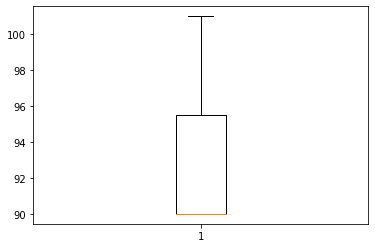

This is the Box plot for Maxpulse


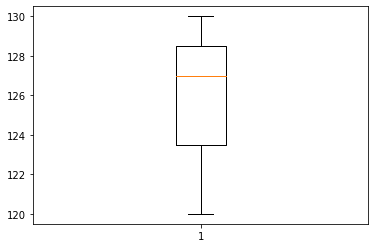

This is the Box plot for Calories


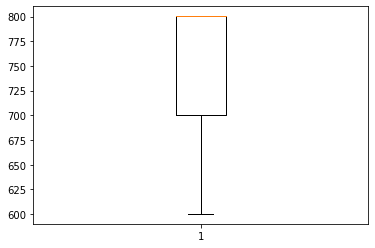

For 150
This is the Box plot for Pulse


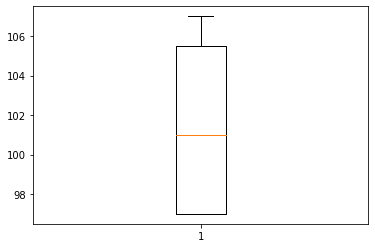

This is the Box plot for Maxpulse


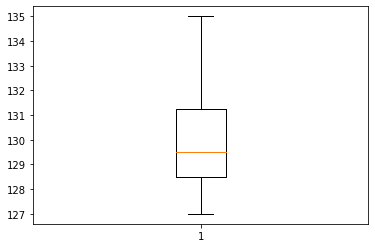

This is the Box plot for Calories


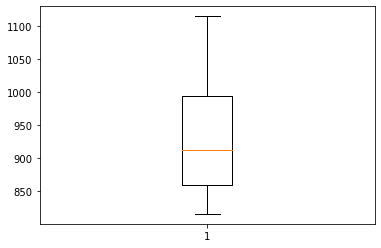

For 300
This is the Box plot for Pulse


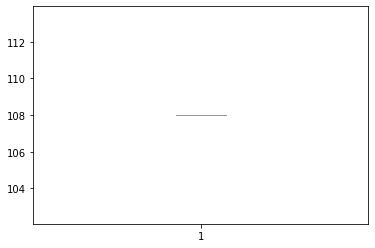

This is the Box plot for Maxpulse


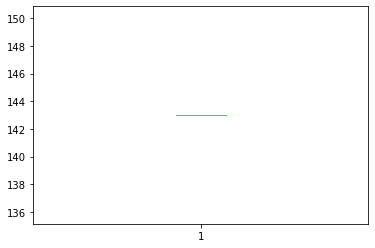

This is the Box plot for Calories


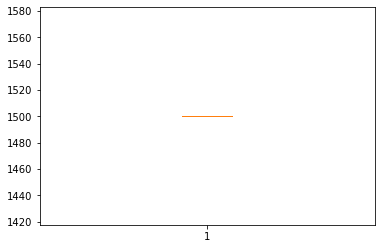

For 90
This is the Box plot for Pulse


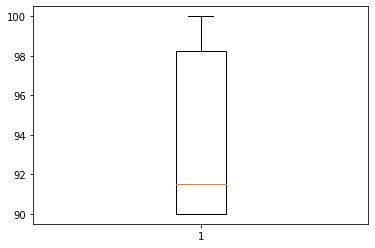

This is the Box plot for Maxpulse


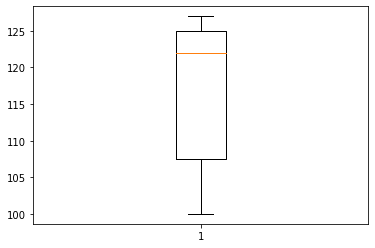

This is the Box plot for Calories


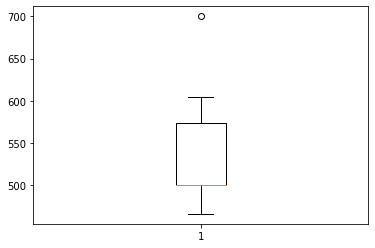

For 120
This is the Box plot for Pulse


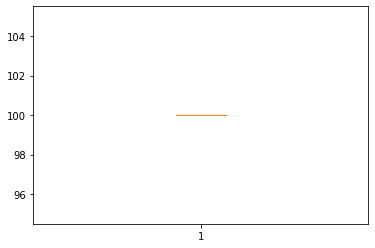

This is the Box plot for Maxpulse


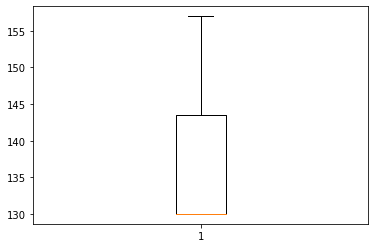

This is the Box plot for Calories


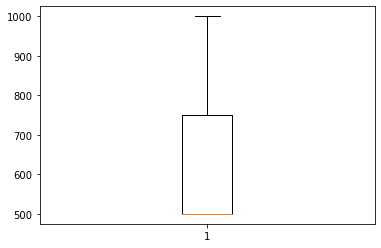

For 270
This is the Box plot for Pulse


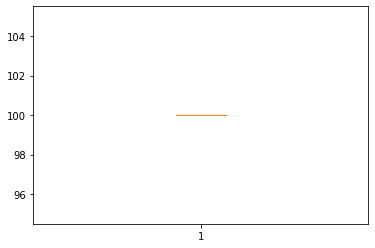

This is the Box plot for Maxpulse


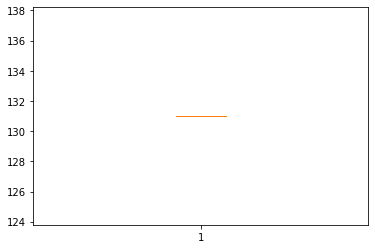

This is the Box plot for Calories


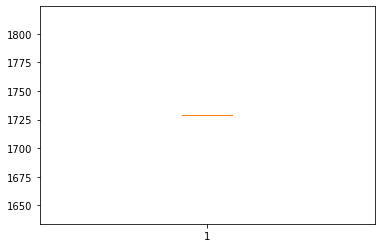

For 15
This is the Box plot for Pulse


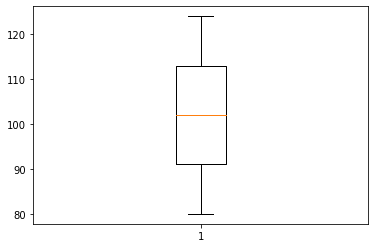

This is the Box plot for Maxpulse


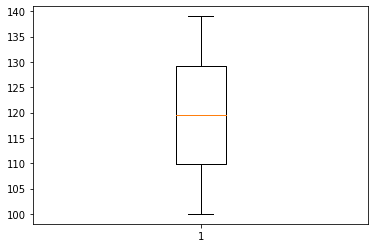

This is the Box plot for Calories


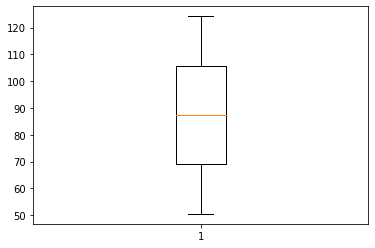

For 25
This is the Box plot for Pulse


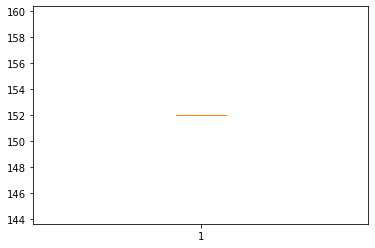

This is the Box plot for Maxpulse


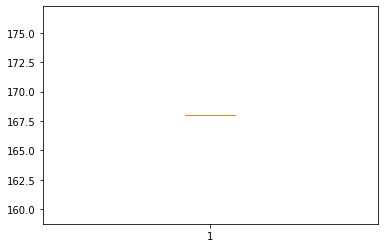

This is the Box plot for Calories


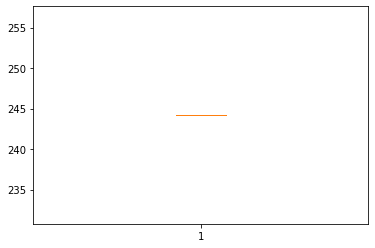

For 75
This is the Box plot for Pulse


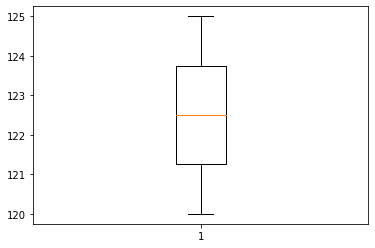

This is the Box plot for Maxpulse


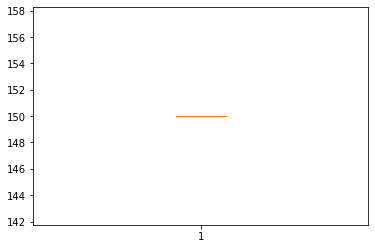

This is the Box plot for Calories


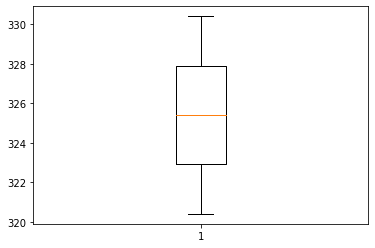

In [17]:
for Dur in df.Duration.unique():
    print(f"For {Dur}")
    for col in col_list:
        print(f"This is the Box plot for {col}")
        plt.boxplot(df[df['Duration'] == Dur][col]);
        plt.show()

There is not really alot of outliers and i dont know the domain of the Data so i cant call Pulse with Dur = 60 has an outlier

In [18]:
indxeslist = []
for Dur in df.Duration.unique():
    for col in col_list:
        indxeslist.append(df[df['Duration'] == Dur]\
        [(np.abs(stats.zscore(df[df['Duration'] == Dur][col])) > 3)].index.values.tolist())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarni

In [19]:
flat_list = list(np.concatenate(indxeslist).flat)
flat_list

[22.0, 144.0, 144.0, 81.0, 121.0]

there are the outliers drop them 

In [20]:
df =  df.drop(flat_list,axis = 0)
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.4
166,60,115,145,310.2
167,75,120,150,320.4


### Cleaining Done 

## Visualize Data

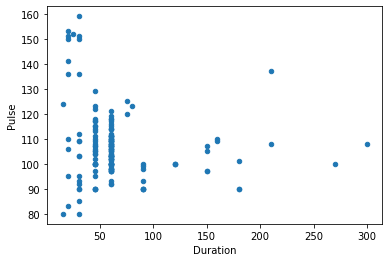

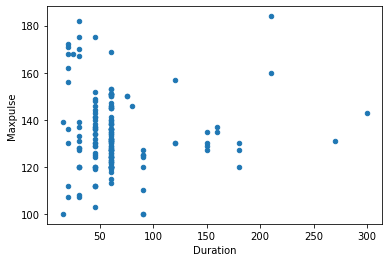

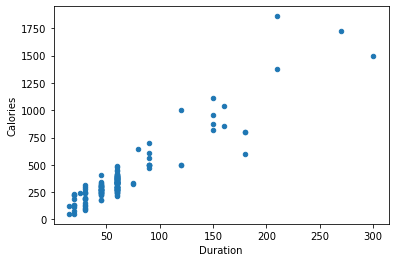

In [21]:
for col in col_list:
    df.plot(kind = 'scatter', x = 'Duration', y = col)
    plt.show()

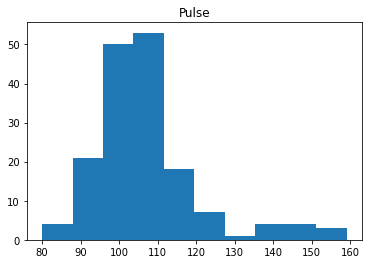

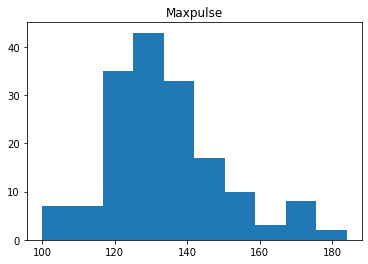

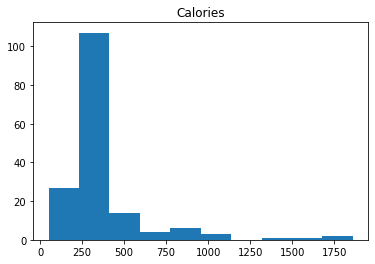

In [22]:
for col in col_list:
    plt.hist(df[col])
    plt.title(f'{col}')
    plt.show()